<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Cp2_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cp2. Supervised-learning

In [1]:
# 기초 세팅
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

Text(0, 0.5, '두 번째 특성')

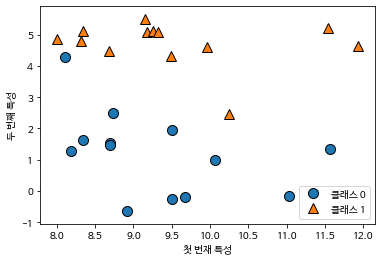

In [2]:
# forge 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번재 특성")
plt.ylabel("두 번째 특성")

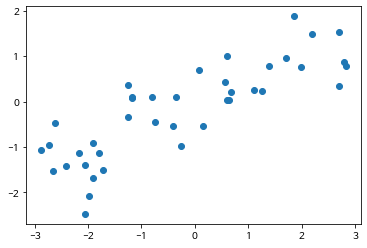

In [3]:
# wave 데이터 셋을 이용해 회귀 알고리즘 알아보기
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt=reload(plt)
plt.plot(X, y, 'o')
plt.ylim = (-3, 3)
plt.xlabel = "feature"
plt.ylabel = "target"

In [4]:
# 실제 유방암 데이터 이용해보기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.keys())
print("데이터의 형태 : ", cancer.data.shape)
print("클래스 별 샘플의 개수:\n", {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
데이터의 형태 :  (569, 30)
클래스 별 샘플의 개수:
 {'malignant': 212, 'benign': 357}


In [5]:
# 보스턴 주택 가격 데이터 이용해보기
from sklearn.datasets import load_boston
boston = load_boston()
print("X.shape : ", boston.data.shape)
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : ", X.shape)

X.shape :  (506, 13)
X.shape :  (506, 104)


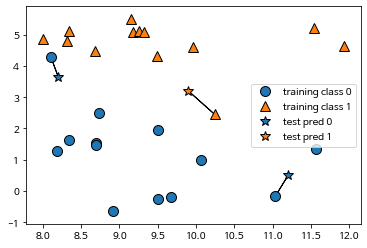

In [6]:
# k최근접 이웃
mglearn.plots.plot_knn_classification(n_neighbors=1)

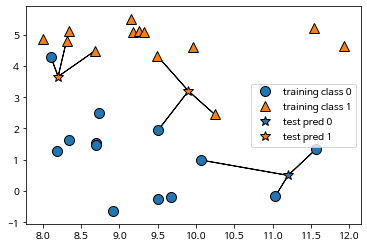

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
# k-최근접 이웃 알고리즘을 이용해 분류(classification) 해보기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
print("3-최근접 이웃 알고리즘으로 결과 예측하기\n", clf.predict(X_test))
print("\n정확도 : {:.2f}" .format(clf.score(X_test, y_test)))

3-최근접 이웃 알고리즘으로 결과 예측하기
 [1 0 1 0 1 0 0]

정확도 : 0.86


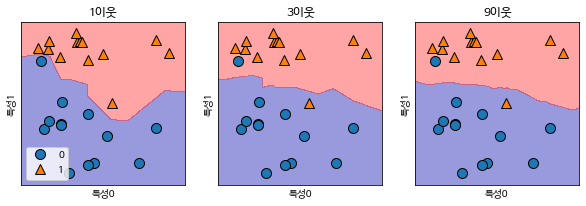

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}이웃" .format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend(loc = 3)

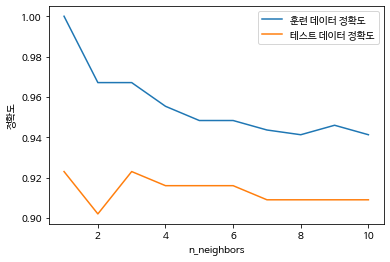

In [10]:
# 유방암 데이터로 분류(classification) 해보기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt=reload(plt)
plt.plot(neighbors_settings, training_accuracy, label = "훈련 데이터 정확도")                                               
plt.plot(neighbors_settings, test_accuracy, label = "테스트 데이터 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

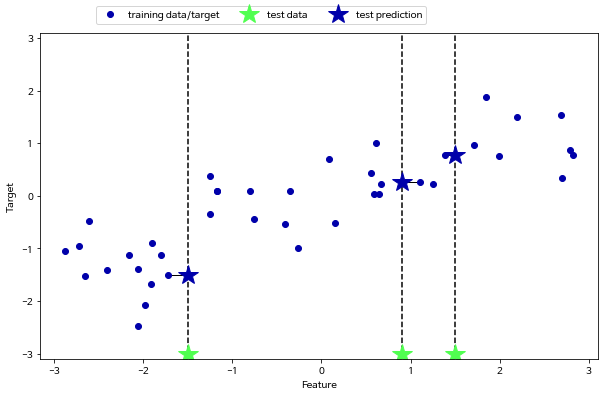

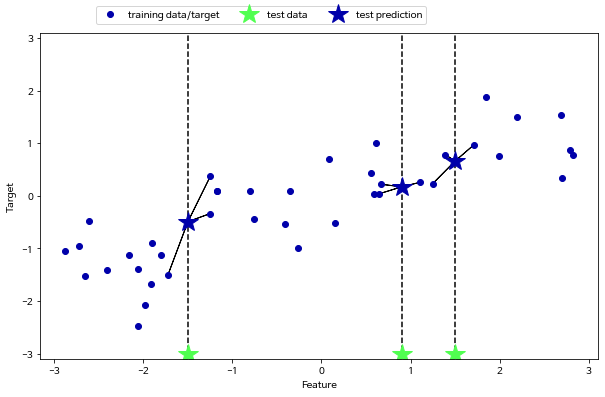

In [11]:
# k-최근접 이웃 알고리즘을 이용해 회귀(regression)해보기
mglearn.plots.plot_knn_regression(n_neighbors = 1)
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [12]:
#scikit learn에서 진짜 해보기
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print("test set 예측해보기:\n", reg.predict(X_test))

test set 예측해보기:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [13]:
print("test set R^2: {:.2f}" .format(reg.score(X_test, y_test)))

test set R^2: 0.83


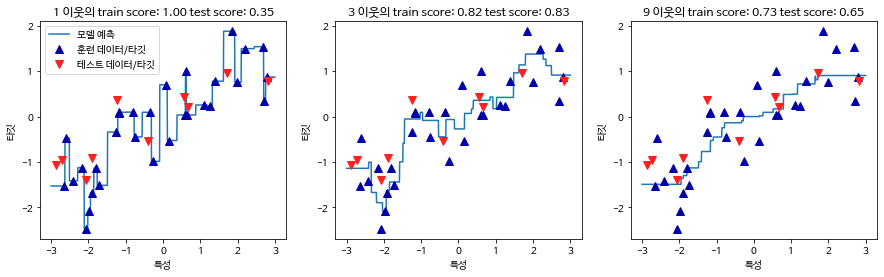

In [14]:
#KNeighborsRegresoor 분석하기
fig, axes = plt.subplots(1, 3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)

    ax.set_title(
        "{} 이웃의 train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

##2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


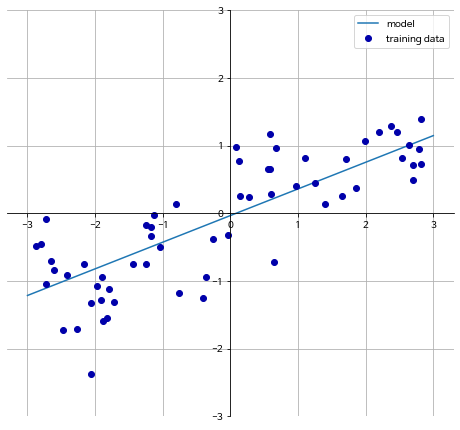

In [15]:
# 회귀의 선형 모델

mglearn.plots.plot_linear_regression_wave()

In [16]:
# 선형 회귀(최소 제곱법)

from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)
print("w : ", lr.coef_)
print("b : ", lr.intercept_)
print("train set의 점수 : {:.2f}" .format(lr.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(lr.score(X_test, y_test)))

w :  [0.39390555]
b :  -0.031804343026759746
train set의 점수 : 0.67
test set의 점수 : 0.66


In [17]:
# 특성이 많은 보스턴 주택가격에서 선형 모델 만들어보기(과대적합)

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
print("train set의 점수 : {:.2f}" .format(lr.score(X_train, y_train)))
print("test set의 점수 : ", lr.score(X_test, y_test))

train set의 점수 : 0.95
test set의 점수 :  0.6074721959665705


In [18]:
# Ridge(리지 회귀) : 과대적합이 되지 않도록 특성이 주는 영향을 제한(규제)
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("train set의 점수 {:.2f}" .format(ridge.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(ridge.score(X_test, y_test)))

train set의 점수 0.89
test set의 점수 : 0.75


In [19]:
print("\napha = 10")
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("train set의 점수 {:.2f}" .format(ridge10.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(ridge10.score(X_test, y_test)))

print("\n\napha = 0.1")
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("train set의 점수 {:.2f}" .format(ridge01.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(ridge01.score(X_test, y_test)))



apha = 10
train set의 점수 0.79
test set의 점수 : 0.64


apha = 0.1
train set의 점수 0.93
test set의 점수 : 0.77


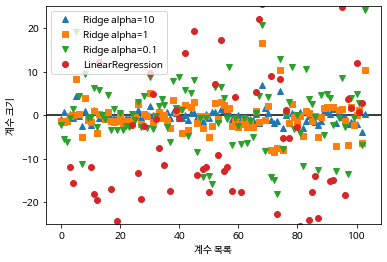

In [20]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

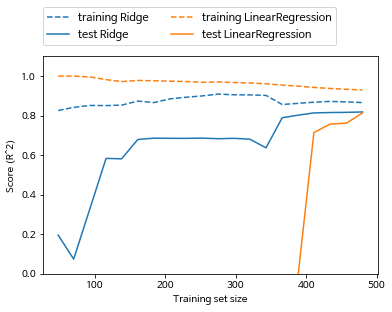

In [21]:
mglearn.plots.plot_ridge_n_samples()

In [22]:
#Lasso(라소 회귀) - 일부 특성만 사용, 분석하기 쉬운 모델
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("train set의 점수 : {:.2f}" .format(lasso.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso.coef_ != 0))

train set의 점수 : 0.29
test set의 점수 : 0.21
사용한 특성의 개수 :  4


In [23]:
lasso001 = Lasso(alpha = 0.01, max_iter = 5000).fit(X_train, y_train)
print("train set의 점수 : {:.2f}" .format(lasso001.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso001.coef_ != 0))

train set의 점수 : 0.90
test set의 점수 : 0.77
사용한 특성의 개수 :  33


In [24]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)
print("train set의 점수 : {:.2f}" .format(lasso00001.score(X_train, y_train)))
print("test set의 점수 : {:.2f}" .format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ != 0))

train set의 점수 : 0.95
test set의 점수 : 0.64
사용한 특성의 개수 :  96


Text(0, 0.5, '계수 크기')

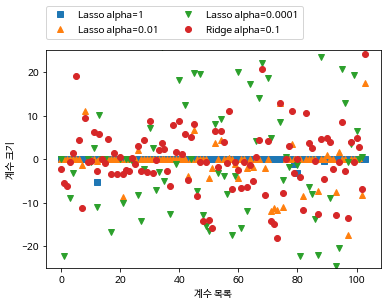

In [25]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

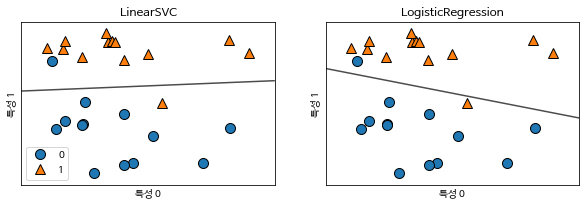

In [26]:
# 분류형 선형 모델 (logistric regression, svc)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

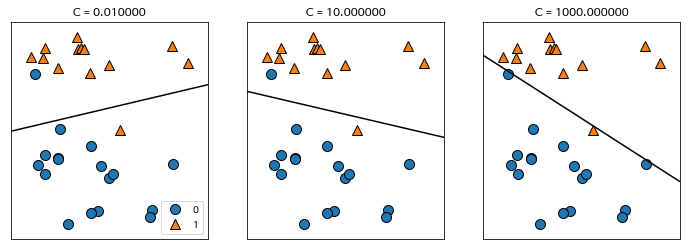

In [27]:
mglearn.plots.plot_linear_svc_regularization()

In [28]:
# 유방암 데이터셋을 이용해 로지스틱 회귀 살펴보기

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("train set의 점수 : {:.3f}" .format(logreg.score(X_train, y_train)))
print("test set의 점수 : {:.3f}" .format(logreg.score(X_test, y_test)))

train set의 점수 : 0.958
test set의 점수 : 0.958


In [29]:
logreg100 = LogisticRegression(C = 100, max_iter = 5000).fit(X_train, y_train)
print("train set의 점수 : {:.3f}" .format(logreg100.score(X_train, y_train)))
print("test set의 점수 : {:.3f}" .format(logreg100.score(X_test, y_test)))

train set의 점수 : 0.981
test set의 점수 : 0.965


In [30]:
logreg001 = LogisticRegression(C = 0.01, max_iter = 5000).fit(X_train, y_train)
print("train set의 점수 : {:.3f}" .format(logreg001.score(X_train, y_train)))
print("test set의 점수 : {:.3f}" .format(logreg001.score(X_test, y_test)))

train set의 점수 : 0.953
test set의 점수 : 0.951


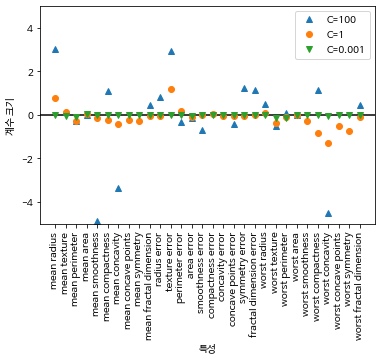

In [31]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C = 0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C = 0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C = 1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C = 1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C = 100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C = 100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


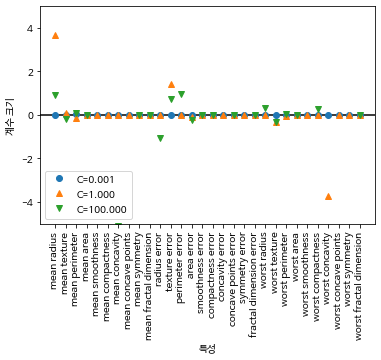

In [32]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver = 'liblinear', C = C, penalty = "l1", max_iter = 1000).fit(X_train, y_train)
    print("C = {:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C = {:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

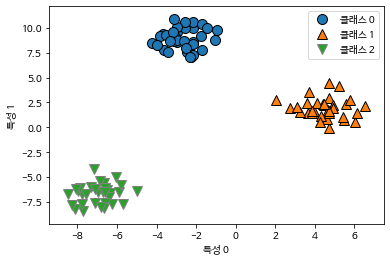

In [33]:
# 다중 클래스 분류용 선형 모델

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

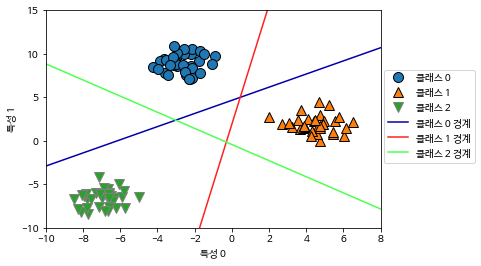

In [34]:
linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

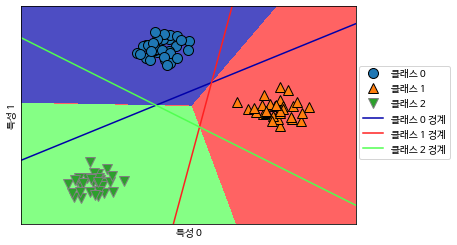

In [35]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 2.3.4 나이브 베이즈 분류기

In [36]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis = 0)
print("특성 count:\n", counts)

특성 count:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 2.3.5 결정 트리

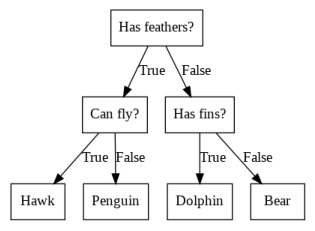

In [37]:
mglearn.plots.plot_animal_tree()

In [38]:
# 결정 트리의 복잡도 제어 <- 과대 적합을 막는 방법
# 1. **사전 가지치기 ** (scikit-learn은 사전 가치지기만 지원)
# 2. 사후 가지치기

from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("train set의 정확도 : {:.3f}" .format(tree.score(X_train, y_train)))
print("test set의 정확도 : {:.3f}" .format(tree.score(X_test, y_test)))

train set의 정확도 : 1.000
test set의 정확도 : 0.937


In [39]:
# 사전 가지치기를 통해 과대적합 방지
# 1. 트리 깊이를 제한
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("train set의 정확도 : {:.3f}" .format(tree.score(X_train, y_train)))
print("test set의 정확도 : {:.3f}" .format(tree.score(X_test, y_test)))

train set의 정확도 : 0.988
test set의 정확도 : 0.951


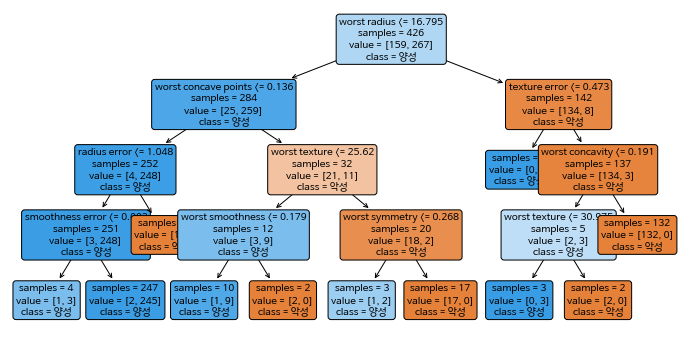

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize = (12, 6))
plot_tree(tree, class_names = ["악성", "양성"], feature_names = cancer.feature_names, impurity = False, filled = True, rounded = True, fontsize = 10)
plt.show()

특성 중요도 :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


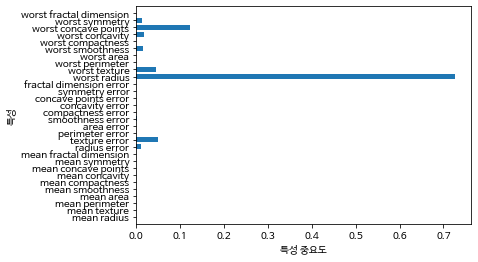

In [41]:
# 트리의 특성 중요도
print("특성 중요도 :\n", tree.feature_importances_)

# 특성 중요도를 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


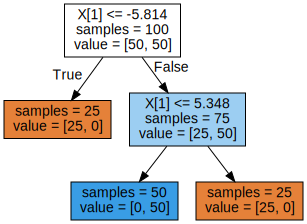

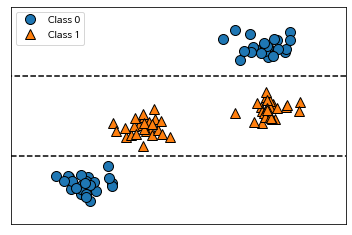

In [42]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, '가격 ($/Mbyte)')

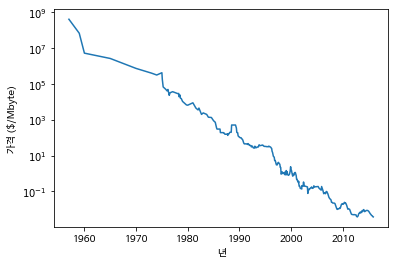

In [43]:
# 결정 트리 사용할 때 주의할 점 : 외십(extrapolation) - 훈련 데이터의 범위 밖의 포인트 예측x
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "DejaVu Sans")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

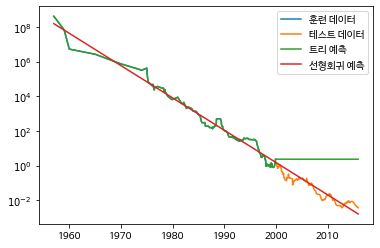

In [44]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = np.exp(tree.predict(X_all))
pred_lr = np.exp(linear_reg.predict(X_all))

plt.yticks(fontname = "DejaVu Sans")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, pred_tree, label="트리 예측")
plt.semilogy(ram_prices.date, pred_lr, label="선형회귀 예측")
plt.legend()

## 2.3.6 결정 트리의 앙상블

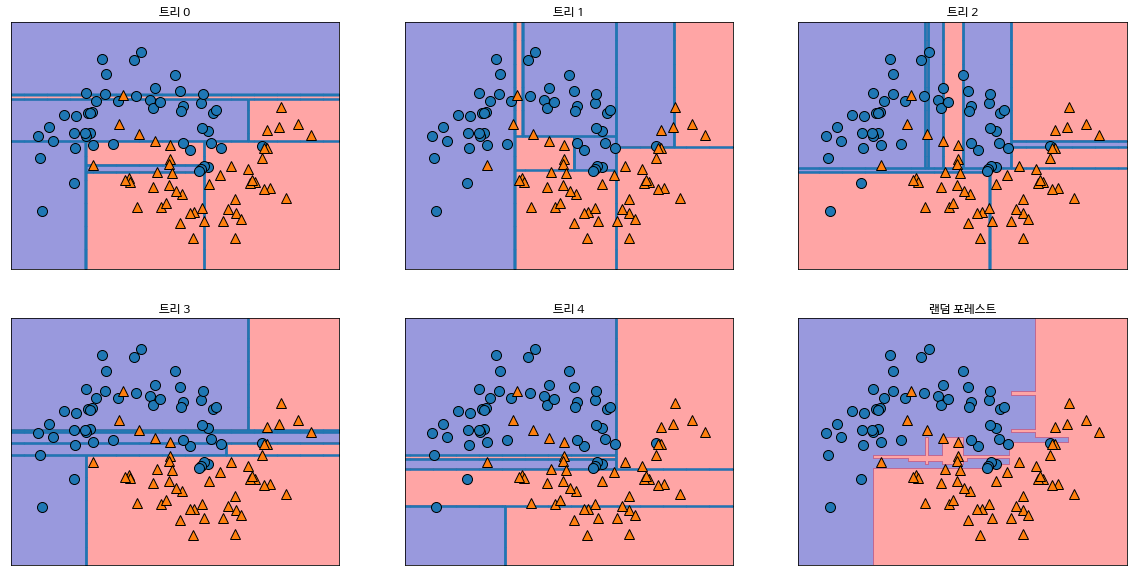

In [48]:
# 랜덤 포레스트 - 랜덩으로 트리를 생성해 평균을 냄 -> 과대적합을 줄임

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

tarin set 정확도 : 1.000
test set 정확도 : 0.972


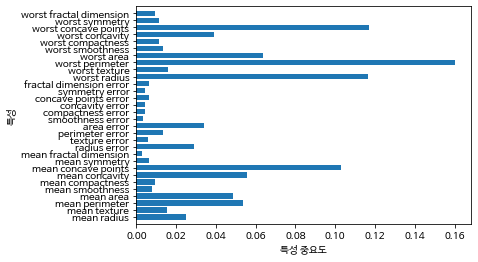

In [50]:
# 유방암 데이터로 랜텀 포레스트 분석해보기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("tarin set 정확도 : {:.3f}" .format(forest.score(X_train, y_train)))
print("test set 정확도 : {:.3f}" .format(forest.score(X_test, y_test)))
plot_feature_importances_cancer(forest)

In [53]:
# 그레이디언트 부스팅 회귀 트리(gradient boosting)
# -> 오차를 보완하는 방식으로 트리를 만듬
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("train set 정확도 : {:.3f}" .format(gbrt.score(X_train, y_train)))
print("test set 정확도 : {:.3f}" .format(gbrt.score(X_test, y_test)))

train set 정확도 : 1.000
test set 정확도 : 0.965


In [56]:
# max_depth를 줄여 과대적합 막기
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("max depth = 1인 경우")
print("train set 정확도 : {:.3f}" .format(gbrt.score(X_train, y_train)))
print("test set 정확도 : {:.3f}" .format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("\nlearning rate = 0.01 인 경우")
print("train set 정확도 : {:.3f}" .format(gbrt.score(X_train, y_train)))
print("test set 정확도 : {:.3f}" .format(gbrt.score(X_test, y_test)))

max depth = 1인 경우
train set 정확도 : 0.991
test set 정확도 : 0.972

learning rate = 0.01 인 경우
train set 정확도 : 0.988
test set 정확도 : 0.965


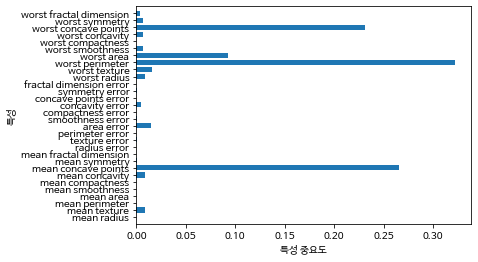

In [57]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 2.3.7 그 외 다른 앙상블